In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
import io
from google.colab import files
from sklearn.neighbors import KNeighborsClassifier



In [ ]:
# Upload and read the dataset
uploaded = files.upload()  # Upload the file from the device
filename = next(iter(uploaded))  # Get the filename
df = pd.read_csv(io.StringIO(uploaded[filename].decode('utf-8')))  # Read data into a DataFrame


Saving healthcare-dataset-stroke-data 1.13.47 PM.csv to healthcare-dataset-stroke-data 1.13.47 PM (1).csv


In [ ]:
print(df.head())

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  


In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.shape

(5110, 12)

data cleaning

In [ ]:
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [ ]:
df.dropna(inplace = True)

In [ ]:
df.drop('id', axis = 1,inplace = True)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [ ]:
scaler = StandardScaler()
label = LabelEncoder()

In [ ]:
# feature target selection

x = df.drop('stroke', axis = 1)
y = df['stroke']

In [ ]:
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
numerical_columns = ['age', 'avg_glucose_level', 'bmi']

In [ ]:
for column in categorical_columns:
    x[column] = label.fit_transform(x[column])
x[numerical_columns] = scaler.fit_transform(x[numerical_columns])

In [ ]:
#train test split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)
x_train.shape, x_test.shape

((3927, 10), (982, 10))

In [ ]:
x_train.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
3565,0,-0.127052,0,0,1,2,1,-0.890034,0.293733,2
898,0,0.715415,0,0,1,3,1,-0.532761,0.497470,0
2707,0,0.626734,0,0,1,2,1,2.523533,0.981345,2
4198,1,1.690903,0,0,1,3,1,-0.768242,-0.635817,1
2746,1,0.981457,0,0,1,3,1,-0.212183,-0.050073,2


In [ ]:
y_train.head()

,stroke
3565,0
898,0
2707,0
4198,0
2746,0


In [ ]:
dt = DecisionTreeClassifier(criterion='gini',min_samples_split= 3, min_samples_leaf = 3,random_state=42)

In [ ]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(min_samples_leaf=3, min_samples_split=3, random_state=42)

In [ ]:
#train accuracy
dt.score(x_train, y_train)

0.977336389101095

In [ ]:
y_pred = dt.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.9195519348268839

In [ ]:
con = confusion_matrix(y_test, y_pred)
con

array([[896,  33],
       [ 46,   7]])

<Axes: >

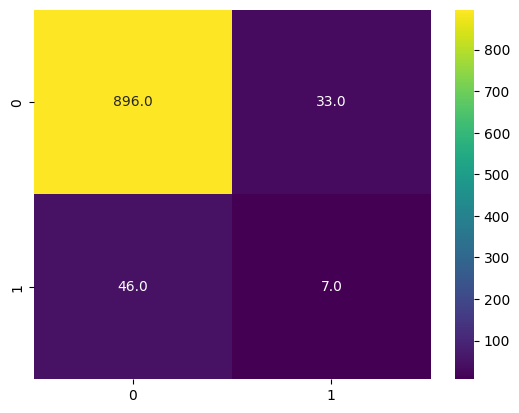

In [ ]:
#confusion matrix
sns.heatmap(con, cmap = 'viridis', annot = True, fmt = '.1f')

In [ ]:
df['stroke'].value_counts()

,count
stroke,
0,4700
1,209


<Axes: xlabel='stroke'>

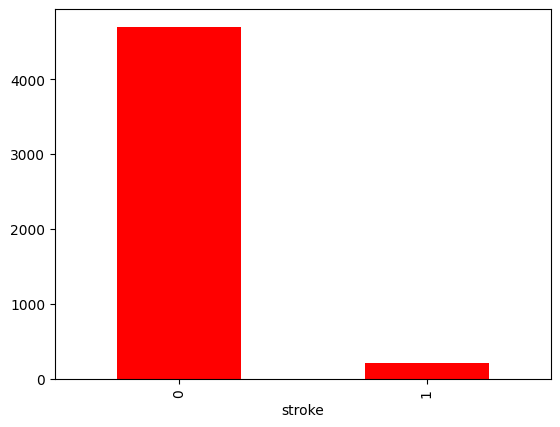

In [ ]:
df['stroke'].value_counts().plot(kind = 'bar', color = 'r')

<Axes: xlabel='work_type', ylabel='avg_glucose_level'>

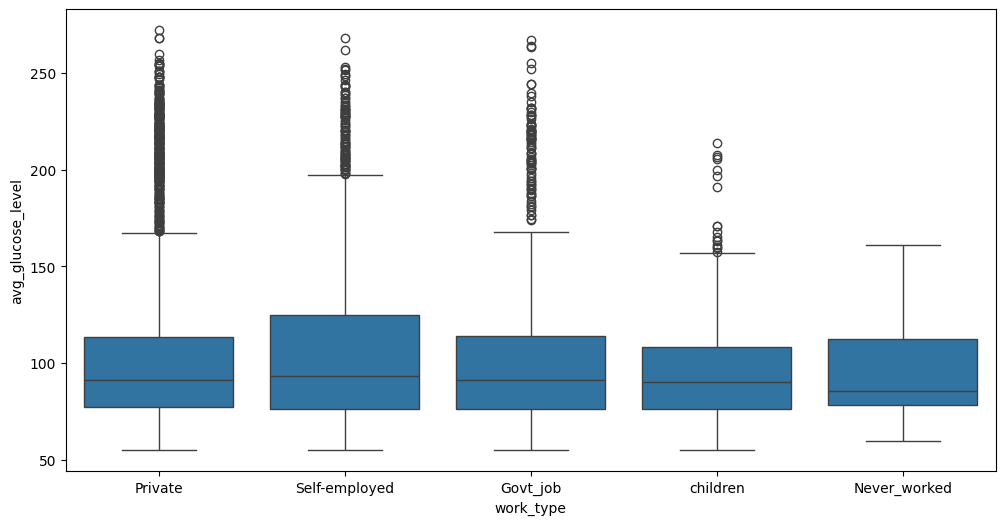

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x = 'work_type' , y  = 'avg_glucose_level' , data = df)

<Axes: xlabel='age', ylabel='Count'>

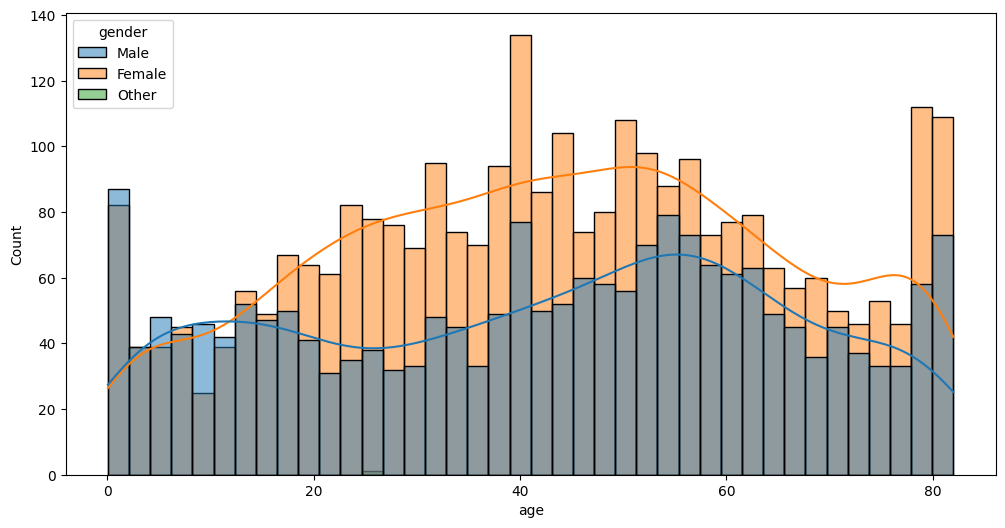

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(x = 'age', data =df, bins = 40, kde = True, hue = 'gender')

<ipython-input-29-44990db9a53d>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = 'Residence_type', y = 'bmi', data =df, palette = 'icefire')


<Axes: xlabel='Residence_type', ylabel='bmi'>

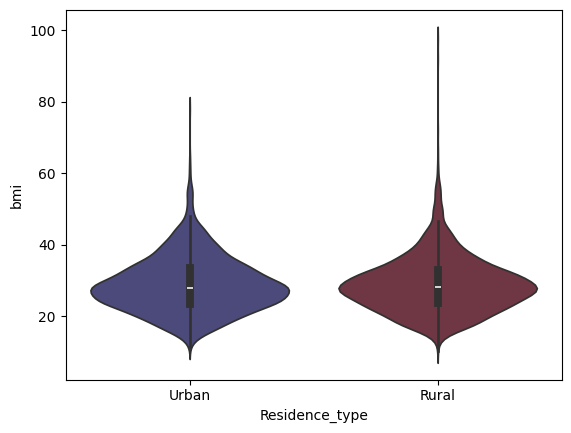

In [ ]:
sns.violinplot(x = 'Residence_type', y = 'bmi', data =df, palette = 'icefire')

<Axes: xlabel='gender', ylabel='bmi'>

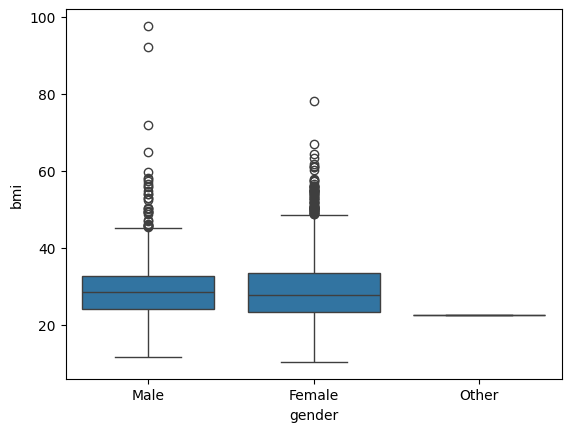

In [ ]:
sns.boxplot(x = 'gender', y = 'bmi', data = df)

# **decision tree**

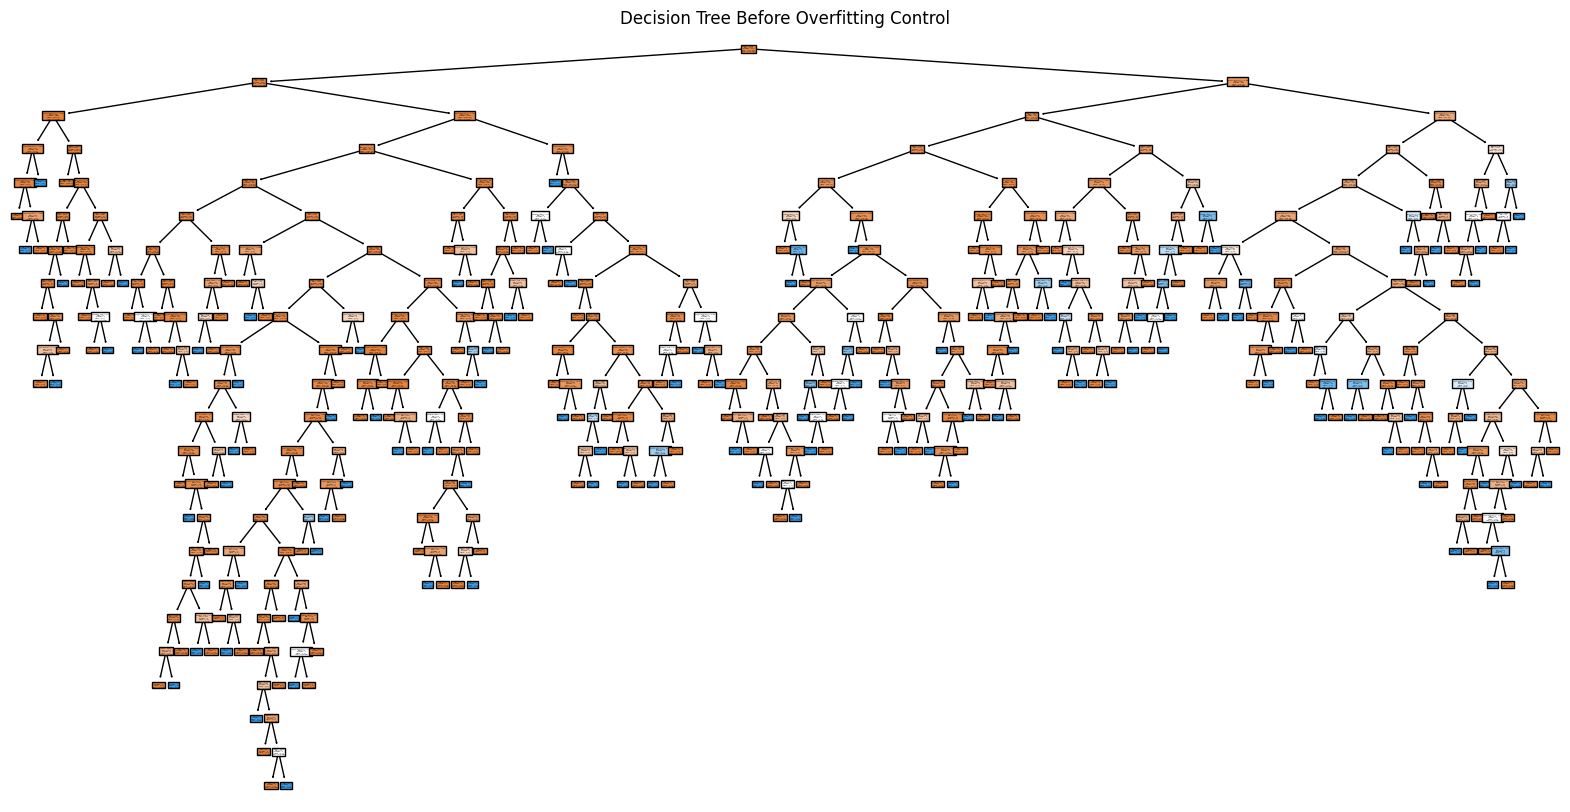

In [ ]:
# Create a decision tree model without any constraints (before controlling for overfitting)
model_before = DecisionTreeClassifier(random_state=42)
model_before.fit(x_train, y_train)

# Plot the decision tree before controlling for overfitting
plt.figure(figsize=(20,10))

# Use the feature names from the original DataFrame 'x' if it was used to create 'X_train'
plot_tree(model_before, filled=True, feature_names=x.columns, class_names=['No Stroke', 'Stroke'])

plt.title("Decision Tree Before Overfitting Control")
plt.show()


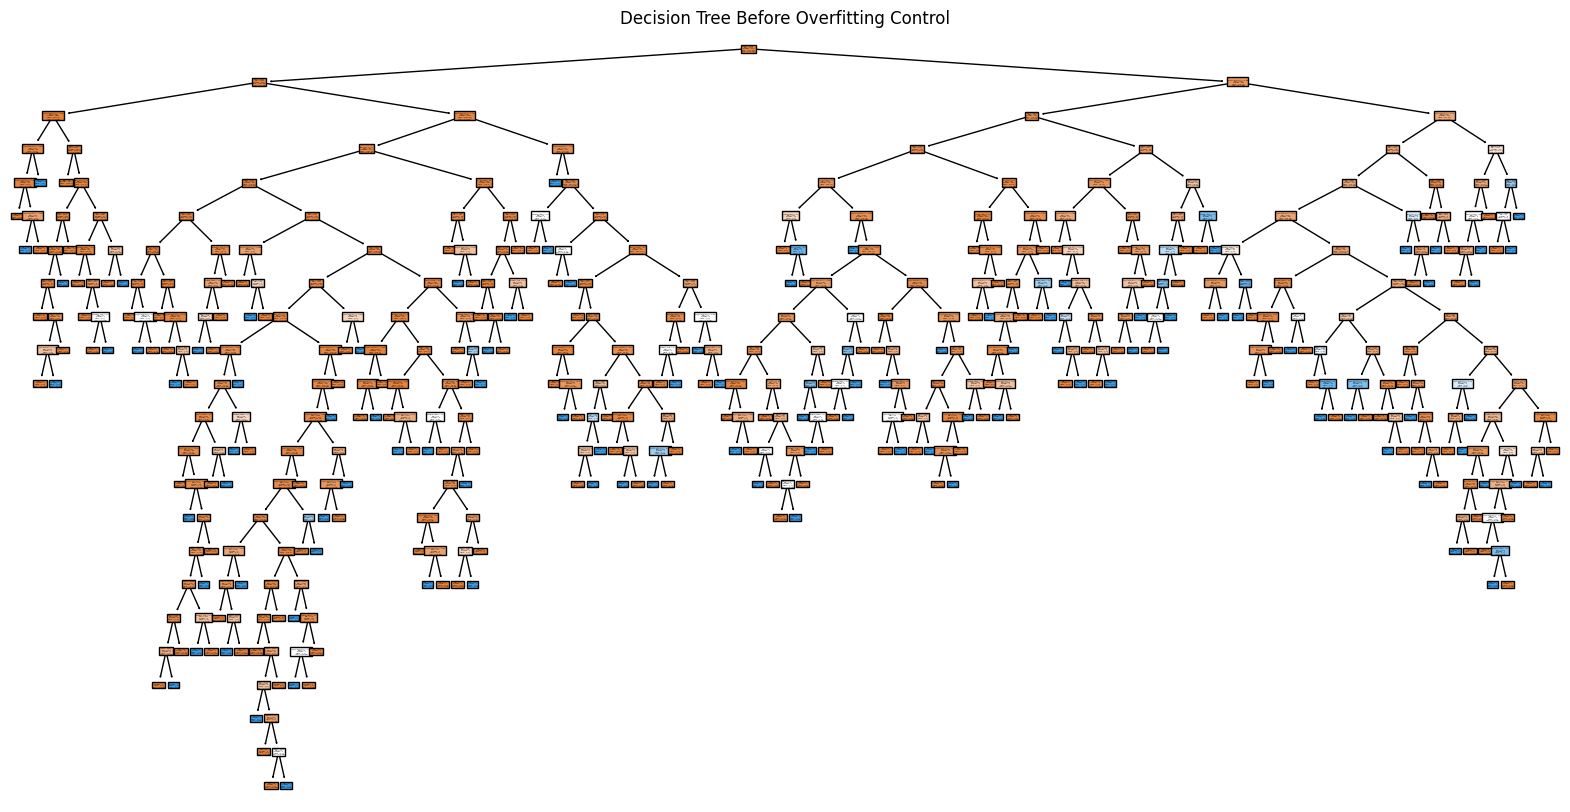

Training Accuracy: 1.00
Testing Accuracy: 0.92


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) # Added this line to create X_train

# Create a decision tree model without any constraints (before controlling for overfitting)
model_before = DecisionTreeClassifier(random_state=42)
model_before.fit(X_train, y_train)

# Plot the decision tree before controlling for overfitting
plt.figure(figsize=(20,10))

plot_tree(model_before, filled=True, feature_names=x.columns, class_names=['No Stroke', 'Stroke'])

plt.title("Decision Tree Before Overfitting Control")
plt.show()


# Predict using the training data to calculate training accuracy
y_train_pred = model_before.predict(X_train)
training_accuracy = accuracy_score(y_train, y_train_pred)

# Predict using the test data to calculate testing accuracy
y_test_pred = model_before.predict(X_test)
testing_accuracy = accuracy_score(y_test, y_test_pred)

# Display training and testing accuracies
print(f"Training Accuracy: {training_accuracy:.2f}")
print(f"Testing Accuracy: {testing_accuracy:.2f}")

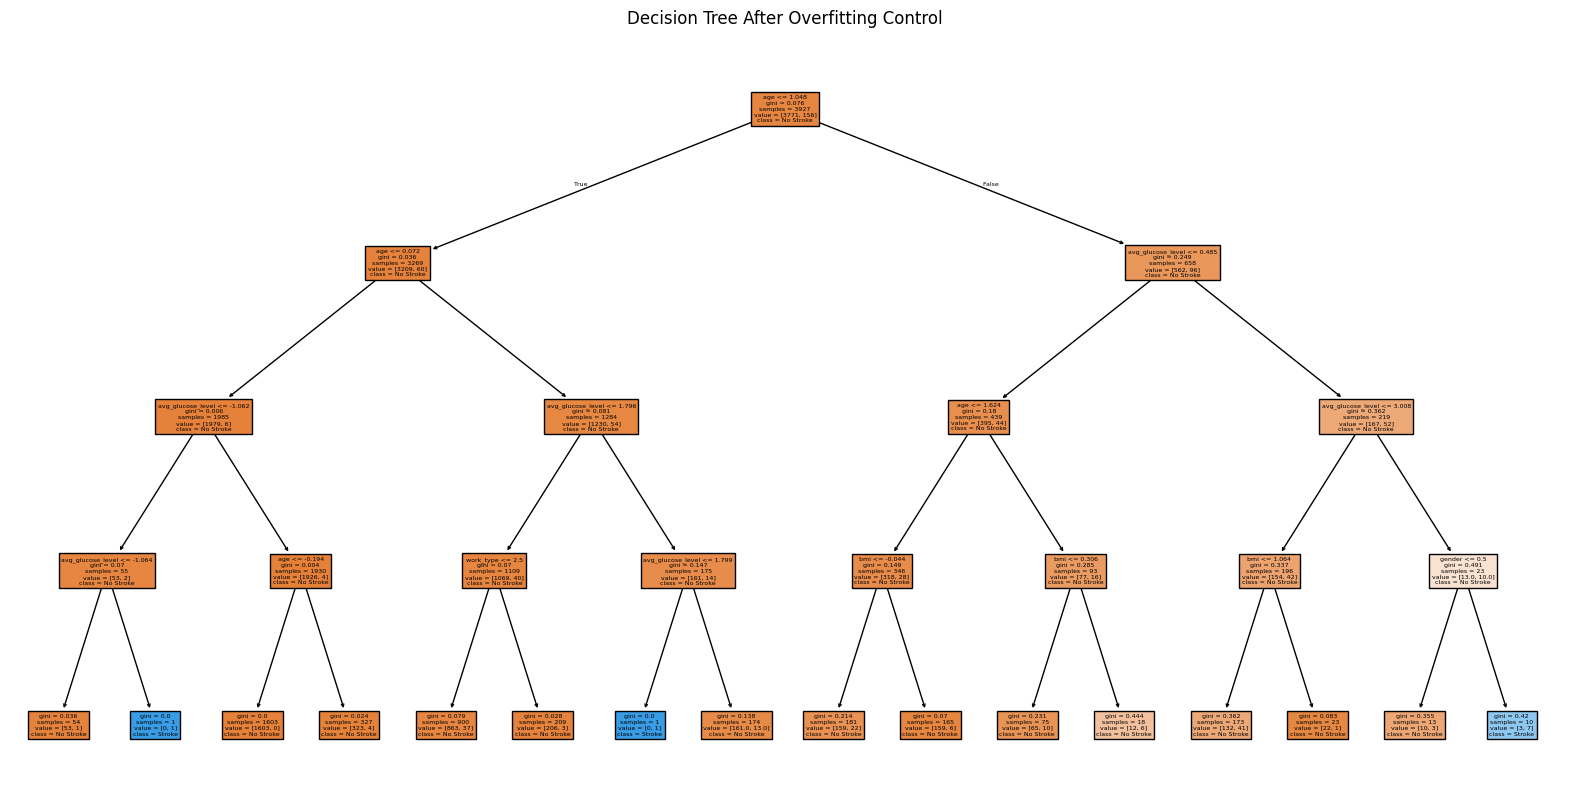

Training Accuracy: 0.96
Testing Accuracy: 0.94


In [ ]:
# Create a decision tree model with constraints to reduce overfitting
model_after = DecisionTreeClassifier(max_depth=4, min_samples_split=10, random_state=42)
model_after.fit(X_train, y_train)  # Train the model on the training data

# Plot the decision tree after applying overfitting constraints
plt.figure(figsize=(20,10))

plot_tree(model_after, filled=True, feature_names=df.columns, class_names=['No Stroke', 'Stroke'])

plt.title("Decision Tree After Overfitting Control")
plt.show()

# Predict using the training data to calculate training accuracy
y_train_pred = model_after.predict(X_train)
training_accuracy = accuracy_score(y_train, y_train_pred)

# Predict using the test data to calculate testing accuracy
y_test_pred = model_after.predict(X_test)
testing_accuracy = accuracy_score(y_test, y_test_pred)

# Display training and testing accuracies
print(f"Training Accuracy: {training_accuracy:.2f}")
print(f"Testing Accuracy: {testing_accuracy:.2f}")


# **Support Vector Machine (SVM)**

In [ ]:
# Handle missing values in the 'bmi' column by filling with the mean value
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())

In [ ]:
# Convert categorical variables to numeric
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])
df['ever_married'] = label_encoder.fit_transform(df['ever_married'])
df['work_type'] = label_encoder.fit_transform(df['work_type'])
df['Residence_type'] = label_encoder.fit_transform(df['Residence_type'])
df['smoking_status'] = label_encoder.fit_transform(df['smoking_status'])

In [ ]:
# Define features (X) and target (y)
X = df.drop(['stroke'], axis=1)  # Remove only the 'stroke' column
y = df['stroke']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
y_pred = svm_model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9511201629327902
Confusion Matrix:
 [[1401    0]
 [  72    0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1401
           1       0.00      0.00      0.00        72

    accuracy                           0.95      1473
   macro avg       0.48      0.50      0.49      1473
weighted avg       0.90      0.95      0.93      1473



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


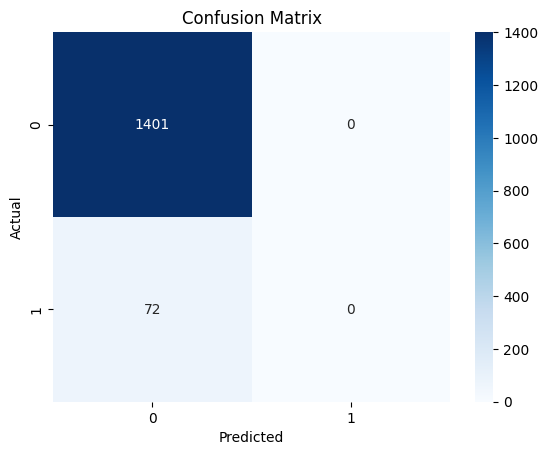

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



# **KNN**




In [ ]:
# Load dataset
df = pd.read_csv('/content/healthcare-dataset-stroke-data 1.13.47 PM (1).csv')

# Data cleaning: handle missing values
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())

# Drop irrelevant columns
df.drop('id', axis=1, inplace=True)

# Encode categorical variables
label_encoder = LabelEncoder()
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])


In [ ]:
# Features and target selection
X = df.drop('stroke', axis=1)
y = df['stroke']

# Scaling numerical features
scaler = StandardScaler()
X[['age', 'avg_glucose_level', 'bmi']] = scaler.fit_transform(X[['age', 'avg_glucose_level', 'bmi']])


In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Set up parameter grid for KNN
param_grid = {'n_neighbors': list(range(1, 21))}

# Use GridSearchCV to find the best value for k
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best k value
best_k = grid_search.best_params_['n_neighbors']
print(f'Best k: {best_k}')


Best k: 10


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [ ]:
# KNN classifier with the best k
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

# Predictions and accuracy
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Print accuracy
print(f'KNN Accuracy: {accuracy * 100:.2f}%')


KNN Accuracy: 93.93%


In [ ]:
from sklearn.metrics import classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9393346379647749
Confusion Matrix:
 [[960   0]
 [ 62   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


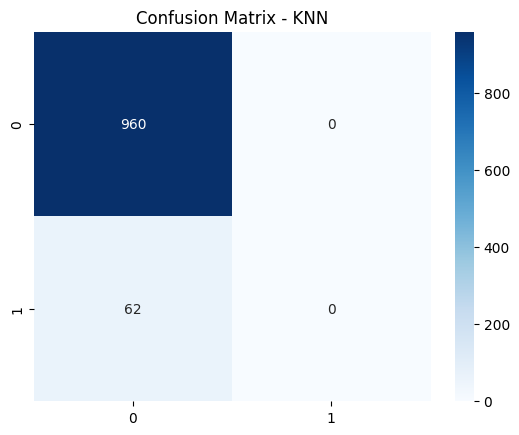

In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - KNN')
plt.show()
